# **PyTorch ile Derin Öğrenme**

In [1]:
import torch

In [2]:
data = [[1,2,3,4],[3,4,5,6]] # liste
x_data = torch.tensor(data) #  listeyi bir tensor veri yapısına dönüştürür.
print(x_data)

tensor([[1, 2, 3, 4],
        [3, 4, 5, 6]])


In [3]:
x_rand = torch.rand_like(x_data,dtype=torch.float)

"""
torch.rand_like(x_data):
Bu fonksiyon, verilen tensorun (burada x_data) boyutlarına uygun yeni bir tensor oluşturur.
"""
print(x_rand)

tensor([[0.0904, 0.1282, 0.2915, 0.9112],
        [0.7593, 0.0537, 0.2118, 0.4221]])


In [4]:
tensor1 = torch.randn(3,4) # 3 satır 4 sütunlu bir matris
tensor2 = torch.randn(4,2) #4 satır 2 sütunlu bir matris
print(tensor1)
print(tensor2)
result = torch.matmul(tensor1,tensor2) # matrix-vector multiplication
print(result)

tensor([[-0.4728, -0.3306, -0.7996, -0.7746],
        [ 1.0722, -1.9002, -0.4457, -1.1121],
        [-0.1261,  0.8518, -1.0640, -0.6395]])
tensor([[-0.3778, -0.6362],
        [ 0.3366, -1.4364],
        [-0.8793, -1.1859],
        [ 1.8501, -0.5658]])
tensor([[-0.6627,  2.1621],
        [-2.7103,  3.2051],
        [ 0.0868,  0.4803]])


# **Fashion-MNIST Veriseti Sınıflandırma Örneği**
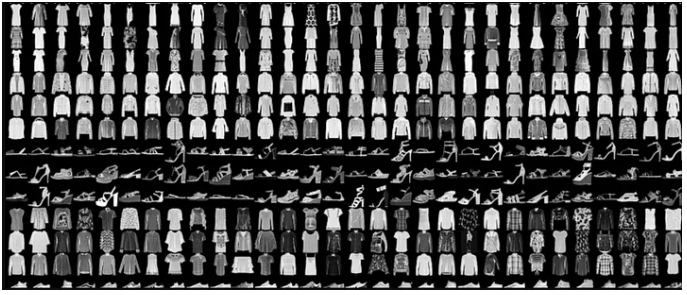

In [5]:
import torch
import torch.nn as nn # Sinir ağları ile ilgili modülleri tanımlama
import torch.nn.functional as F # Aktivatör fonksiyonları gibi çeşitli yardımcı fonksiyonlar
import torch.optim as optim # Modelin parametrelerini güncellemek için optimizasyon fonksiyonları
from torchvision import datasets # Fachion-MNIST gibi verisetlerine erişmek için
from torchvision import transforms # Görüntüleri normalize etmek ve dönüştürmek için

1. VERİ HAZIRLAMA

In [6]:
transform = transforms.Compose([ # Birden fazla dönüşüm (preprocessing) işlemini sıralı bir şekilde uygular.
    transforms.ToTensor(), # Görüntüleri tensor veri yapısına dönüştürür.
    transforms.Normalize((0.5,), (0.5,)) # Piksel değerlerini -1 ile 1 arasında normalize edilmesi.
    # Ortalama (mean) değeri 0.5
    # Standart sapma (std) değeri 0.5
    # Normalizasyon formülü: (değer - mean) / std
    # Piksel değerlerini -1 ile 1 arasında ölçekler
])

# Fashion-MNIST veri setini indir ve yükle
train_dataset = datasets.FashionMNIST(root='./fashion_mnist_data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./fashion_mnist_data', train=False, download=True, transform=transform)


    # train=True: Eğitim veri setini yükler.
    # train=False: Test veri setini yükler.
    # download=True: Veri setini indirmesi gerektiğini belirtir.
    # transform=transform: Görüntülere yukarıdaki dönüşümler (ToTensor, Normalize) uygulanır.


# Veri yükleyiciler (DataLoader)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# PyTorch'un DataLoader sınıfını kullanarak eğitim ve test veri setlerini daha verimli bir şekilde modelin eğitimi ve test süreci için hazırlar.
# DataLoader, veriyi mini-batch'ler halinde yükler ve eğitim sırasında veriyle çalışmayı kolaylaştırır.
    
# batch_size=64: Veriler, 64 görüntülük mini-batch'ler halinde yüklenecek.
# Örneğin, eğitim veri seti 60.000 görüntüden oluşuyorsa, her bir batch 64 görüntü içerir ve bu şekilde toplamda 937 batch oluşur (60.000 / 64 ≈ 937)

# shuffle=True:
# Eğitim sırasında veri her epoch başında karıştırılır.
# Verilerin karıştırılması, modelin ezberlemesini önler ve öğrenmeyi iyileştirir.

2. SİNİR AĞININ OLUŞTURULMASI

In [7]:
class FashionMNISTClassifier(nn.Module):
    def __init__(self):
        super(FashionMNISTClassifier, self).__init__()
        # Katmanları tanımlıyoruz
        self.fc1 = nn.Linear(28 * 28, 256)  # Girdi boyutu (28x28 pikselleri düzle)
        self.fc2 = nn.Linear(256, 128)  # Gizli katman
        self.fc3 = nn.Linear(128, 64)   # Gizli katman
        self.fc4 = nn.Linear(64, 10)    # Çıkış (10 sınıf)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # 28x28 görüntüyü 1x784 vektörüne düzleştirir
        x = F.relu(self.fc1(x))  # Aktivasyon fonksiyonu olarak ReLU kullanır.
        x = F.relu(self.fc2(x))  # Aktivasyon fonksiyonu olarak ReLU kullanır.
        x = F.relu(self.fc3(x))  # Aktivasyon fonksiyonu olarak ReLU kullanır.
        x = self.fc4(x)  # Son katmanın çıkışı
        return x

Bu kod, **Fashion-MNIST veri seti** üzerinde çalışmak için bir **yapay sinir ağı (Neural Network)** modelini tanımlıyor. Model, **28x28 boyutundaki görüntüleri** alarak **10 farklı sınıfa** (Fashion-MNIST sınıfları: tişört, ayakkabı, çanta, vb.) sınıflandırır.

- **`FashionMNISTClassifier`**:
  - Bu, PyTorch’un `nn.Module` sınıfından türetilmiş bir sinir ağı sınıfıdır.
  - Yapay sinir ağı için katmanlar ve ileri besleme (forward pass) işlemleri tanımlanır.
- **Amaç:**
  - Fashion-MNIST veri setini kullanarak sınıflandırma yapmak.

- **`__init__()`**:
  - Modelin katmanlarını tanımlamak için kullanılır.

- **Katmanlar:**
  1. **`self.fc1 = nn.Linear(28 * 28, 256)`**:
     - İlk tam bağlantılı katman (fully connected layer).
     - Giriş boyutu: `28x28` piksel (düzleştirilmiş 784 boyutlu vektör).
     - Çıkış boyutu: `256` nöron.
  2. **`self.fc2 = nn.Linear(256, 128)`**:
     - İkinci katman.
     - Giriş boyutu: `256` nöron.
     - Çıkış boyutu: `128` nöron.
  3. **`self.fc3 = nn.Linear(128, 64)`**:
     - Üçüncü katman.
     - Giriş boyutu: `128` nöron.
     - Çıkış boyutu: `64` nöron.
  4. **`self.fc4 = nn.Linear(64, 10)`**:
     - Son katman (çıkış katmanı).
     - Giriş boyutu: `64` nöron.

---

#### **3. İleri Besleme Fonksiyonu (Forward Pass):**

- **Amaç:**
  - Modelin giriş verisini alıp katmanlar boyunca ileri besleme işlemi yapar ve bir tahmin (çıkış) üretir.

- **Adım Adım Açıklama:**
  1. **`x.view(-1, 28 * 28)`**:
     - Girişteki görüntü, `(28, 28)` boyutundadır (2D).
     - Bu, görüntüyü düzleştirerek `(1, 784)` boyutunda bir vektöre dönüştürür.
     - `-1`: Mini-batch boyutunu otomatik ayarlar.
  2. **`F.relu(self.fc1(x))`**:
     - İlk tam bağlantılı katmana (fc1) giriş verisi verilir.
     - Çıktıya ReLU (Rectified Linear Unit) aktivasyon fonksiyonu uygulanır:
       - ReLU: `f(x) = max(0, x)`. Negatif değerleri sıfıra çeker.
  3. **`F.relu(self.fc2(x))`**:
     - İkinci tam bağlantılı katman (fc2) ve ReLU uygulanır.
  4. **`F.relu(self.fc3(x))`**:
     - Üçüncü tam bağlantılı katman (fc3) ve ReLU uygulanır.
  5. **`self.fc4(x)`**:
     - Son tam bağlantılı katman (fc4).
     - Bu katmanda ReLU kullanılmaz, çünkü burası modelin sınıflandırma sonuçlarını döndürdüğü yerdir (10 sınıf için skorlama).


#### **4. Model Çıkışı:**
- Çıkış (son katman `fc4`) boyutu `(batch_size, 10)` olacaktır:
  - **`batch_size`**: Bir batch içinde kaç görüntü olduğuna bağlıdır.
  - **`10`**: Fashion-MNIST'in 10 farklı sınıfı (örneğin, tişört, pantolon, çanta vb.).


# **3. Kayıp Fonksiyonu ve Optimizasyon**

In [8]:
model = FashionMNISTClassifier() # Modelin oluşturulması
criterion = nn.CrossEntropyLoss()  # Çoklu sınıf kayıp fonksiyonu
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizatörünü tanımlar, öğrenme hızı [learning rate](lr) = 0.001.

# **4. Modelin Eğitilmesi**

In [9]:
num_epochs = 5  # Döngü sayısı

for epoch in range(num_epochs):
    model.train()  # Modeli eğitim moduna al
    running_loss = 0.0  # Toplam kayıp (loss)

    for images, labels in train_loader: # Her batch'deki veriler çekilir.
        optimizer.zero_grad() # Önceki epoch'tan kalan gradyanları sıfırlar.
        outputs = model(images) # Modeli çalıştır
        loss = criterion(outputs, labels) # Kayıp hesaplanır
        loss.backward() # Geri yayılım yapılır
        optimizer.step() # Modelin ağırlıkları güncellenir
        running_loss += loss.item() # Her mini-batch için kayıp değeri (loss.item()) toplama eklenir. 
        # Epoch sonunda, bu toplam kayıp değeri kullanılarak ortalama kayıp hesaplanır.
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}") # Epoch Sonucu Yazdırma

Epoch [1/5], Loss: 0.5174
Epoch [2/5], Loss: 0.3745
Epoch [3/5], Loss: 0.3361
Epoch [4/5], Loss: 0.3110
Epoch [5/5], Loss: 0.2899


# **5. Modelin Test Edilmesi**

In [10]:
model.eval() # Modeli değerlendirme moduna alır.
correct = 0
total = 0

with torch.no_grad(): # Gradyan hesaplamasını kapatır
    for images, labels in test_loader: # Test verileri ile çalışır.
        outputs = model(images) # model çalıştırılır
        _, predicted = torch.max(outputs.data, 1) # En yüksek olasılığa sahip sınıfı bulur.
        # labels: Bu, veri kümesindeki o mini-batch'e ait doğru etiketlerin olduğu bir tensördür. Bu tensör, her resim için 0-9 arasında bir sınıf değeri içerir.
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # labels = [3, 0, 2, 8, 6, 1, 7, 2]
        # predicted = [3, 0, 2, 9, 6, 1, 7, 4]
        # predicted == labels  => [True, True, True, False, True, True, True, False]

accuracy = 100 * correct / total # Test veri seti üzerindeki doğruluğu (accuracy) yüzdesel olarak hesaplar:
print(f'Accuracy on the test set: {accuracy:.2f}%')

# Modeli kaydet
torch.save(model.state_dict(), 'fashion_mnist_model.pth')
print("Model saved as 'fashion_mnist_model.pth'")

Accuracy on the test set: 87.62%
Model saved as 'fashion_mnist_model.pth'


labels.size(0):

    Mini-batch içindeki toplam görüntü sayısını verir.
    total: Test veri setindeki toplam görüntü sayısını tutar.

(predicted == labels).sum().item():

    predicted ile labels karşılaştırılır ve doğru tahmin edilenlerin sayısı bulunur.
    correct: Modelin doğru tahmin ettiği toplam örnek sayısını tutar.